In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel(r"C:\Users\Lenovo\Downloads\Task_Data_Scientist_Dataset.xlsx")

In [4]:
# Define the file path
excel_file = r'C:\Users\Lenovo\Downloads\Task_Data_Scientist_Dataset.xlsx'

In [5]:
# Create an ExcelFile object
excel_data = pd.ExcelFile(excel_file)

We have created an ExcelFile and stored all the sheets in an object named excel_data. One of the sheet_name is 'Description' which contains the description of the labels, we need to remove it since it is not required in our analysis and modelling.

In [6]:
sheet_names = excel_data.sheet_names

In [7]:
# Remove 'Description' from sheet names if it exists
if 'Description' in sheet_names:
    sheet_names.remove('Description')


In [8]:
print(sheet_names)

['Soc_Dem', 'Products_ActBalance', 'Inflow_Outflow', 'Sales_Revenues']


Now we will check whether there are multiple entries of a client in all the sheets.

In [9]:
# Check each sheet for multiple records per client
for sheet_name in sheet_names:
    # Read each sheet into a DataFrame
    df = excel_data.parse(sheet_name)
    
    # Check if any client has more than one record
    clients_with_multiple_records = df['Client'].value_counts()[df['Client'].value_counts() > 1]
    
    print(sheet_name)
    print(clients_with_multiple_records)

Soc_Dem
Series([], Name: Client, dtype: int64)
Products_ActBalance
Series([], Name: Client, dtype: int64)
Inflow_Outflow
Series([], Name: Client, dtype: int64)
Sales_Revenues
Series([], Name: Client, dtype: int64)


From the above code we can check that it didn't print any clients, so that means the client entries in each sheet are unique.

In [10]:
# Read each sheet into a DataFrame and store them in a dictionary
dfs = {sheet_name: excel_data.parse(sheet_name) for sheet_name in sheet_names}

In [11]:
# Merge Data: Combine all DataFrames into a single DataFrame using client ID as the common identifier
merged_df = pd.concat(dfs.values(), ignore_index=True)

# Perform an outer merge on client ID to ensure all client IDs from all sheets are included
for i, (sheet_name, df) in enumerate(dfs.items()):
    if i == 0:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Client', how='outer')


In [12]:
merged_df.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909,M,21,27,1,NaN,NaN,1.0,NaN,1.0,...,7.0,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0
3,1473,M,54,34,1,1.0,NaN,NaN,1.0,1.0,...,38.0,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0
4,1038,M,29,106,1,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [138]:
merged_df.to_csv('merged_df.csv', index=False)

**Exploratory Data Analysis (EDA)**

Steps Performed:
1. Handling Missing values
2. Handling Age of clients less than 16
3. Transforming Catagorical Variables into Numerical Variables
4. Correlation Analysis

In [13]:
print("Shape of the merged DataFrame:", merged_df.shape)

Shape of the merged DataFrame: (1615, 36)


In [14]:
print("Columns in the merged DataFrame:", merged_df.columns)

Columns in the merged DataFrame: Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')


In [14]:
print("\nSummary statistics:")
print(merged_df.describe())



Summary statistics:
            Client          Age       Tenure     Count_CA    Count_SA  \
count  1615.000000  1615.000000  1615.000000  1615.000000  426.000000   
mean    808.000000    42.848916   101.339938     1.078638    1.166667   
std     466.354658    18.550529    64.917297     0.333035    0.468205   
min       1.000000     0.000000     0.000000     1.000000    1.000000   
25%     404.500000    29.000000    44.000000     1.000000    1.000000   
50%     808.000000    41.000000    97.000000     1.000000    1.000000   
75%    1211.500000    57.000000   151.000000     1.000000    1.000000   
max    1615.000000    97.000000   273.000000     4.000000    5.000000   

         Count_MF  Count_OVD  Count_CC    Count_CL      ActBal_CA  ...  \
count  306.000000      419.0     170.0  135.000000    1615.000000  ...   
mean     4.676471        1.0       1.0    1.185185    2438.601941  ...   
std      7.845009        0.0       0.0    0.520980    7072.777350  ...   
min      1.000000        

In [15]:
# CHECK WHETHER THERE ARE CLIENTS WITH AGE BELOW 16
# Find the minimum age in the dataset
min_age = merged_df['Age'].min()

# Filter the dataset to include clients with ages less than 16
clients_age_below_16 = merged_df[merged_df['Age'] < 16]

# Count the number of clients with ages less than 16
num_clients_age_below_16 = len(clients_age_below_16)

print("Minimum Age:", min_age)
print("Number of clients with age less than 16:", num_clients_age_below_16)


Minimum Age: 0
Number of clients with age less than 16: 78


There are 78 clients with age less than 16. Here it can be a reason for wrong entry or an error, so we will fix the minumum legal age to open a bank account as 16 and convert all the clients accordingly.

In [16]:
#Checking the data types of all the variables
data_types = merged_df.dtypes
print(data_types)

Client                            int64
Sex                              object
Age                               int64
Tenure                            int64
Count_CA                          int64
Count_SA                        float64
Count_MF                        float64
Count_OVD                       float64
Count_CC                        float64
Count_CL                        float64
ActBal_CA                       float64
ActBal_SA                       float64
ActBal_MF                       float64
ActBal_OVD                      float64
ActBal_CC                       float64
ActBal_CL                       float64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                float64
TransactionsCred_CA             float64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64


In [17]:
# Identify columns with missing values
missing_columns = merged_df.columns[merged_df.isnull().any()]
missing_columns

Index(['Sex', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
       'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL',
       'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')

In [18]:
# Here we will try to visualize the missing values
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Create a missingness matrix
missing_data = merged_df.isnull()


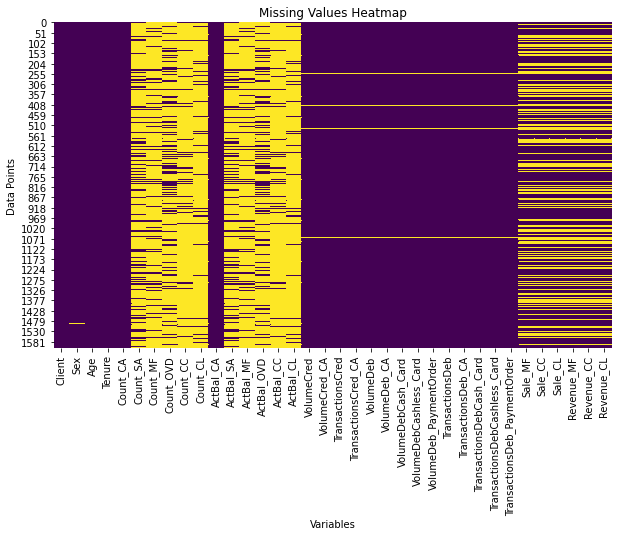

In [20]:
# Plot the missingness matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Variables')
plt.ylabel('Data Points')
plt.show()

In [24]:
#Replace missing values in the 'Sex' column with the mode . This assumes that the majority of 
#individuals have a certain gender, making it a reasonable estimate for missing values.
#merged_df['Sex'].fillna(merged_df['Sex'].mode()[0], inplace=True)

In [19]:
#If above code shows warning, use this
# Replace missing values in the 'Sex' column with the mode
# This assumes that the majority of individuals have a certain gender, making it a reasonable estimate for missing values.
merged_df.loc[:, 'Sex'] = merged_df['Sex'].fillna(merged_df['Sex'].mode()[0])

In [20]:
merged_df.columns[merged_df.isnull().any()]

Index(['Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
       'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL',
       'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')

**HANDLING OF MISSING VALUES**

Assumptions on missing value

1. Count variables (Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL):
These variables represent the number of live accounts or products owned by clients.
Missing values could indicate that the client doesn't have the respective type of account. It might be reasonable to assume that missing values can be treated as zero, indicating that the client does not have that particular type of account.
Treatment: Impute missing values with 0.


2. Balance variables (ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL):
These variables represent the actual balance in different types of accounts.
Missing values could indicate that the client doesn't have the respective type of account or has a zero balance.
Treatment: Impute missing values with 0 .


3. Volume and Transactions variables (VolumeCred, VolumeCred_CA, TransactionsCred, TransactionsCred_CA, VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder, TransactionsDeb, TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder):
The missing values in columns like 'VolumeCred', 'VolumeDeb', 'TransactionsCred', and 'TransactionsDeb' could indicate that the respective clients had no activity or turnover during the observed period. Imputing these missing values with 0 reflects the absence of activity for these clients.

In [22]:

# List of columns to replace missing values with 0
columns_to_replace_with_0 = ['Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
                             'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL',
                             'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
                             'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
                             'VolumeDebCash_Card', 'VolumeDebCashless_Card',
                             'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
                             'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
                             'TransactionsDeb_PaymentOrder']

# Replace missing values with 0 for the specified columns
merged_df[columns_to_replace_with_0] = merged_df[columns_to_replace_with_0].fillna(0)


In [23]:
merged_df.columns[merged_df.isnull().any()]

Index(['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC',
       'Revenue_CL'],
      dtype='object')

**Transforming Catagorical Variables i.e. Sex into Numeric Variables**

In [24]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Sex" variable
merged_df['Sex_encoded'] = label_encoder.fit_transform(merged_df['Sex'])

# Print the mapping of original categories to encoded numerical values
print("Mapping of original categories to encoded numerical values:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

Mapping of original categories to encoded numerical values:
F: 0
M: 1


In [25]:
# Drop the original "Sex" variable if desired
merged_df.drop(columns=['Sex'], inplace=True)

In [26]:
merged_df.head()

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex_encoded
0,909,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,...,1.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1217,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
2,850,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,...,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.893929,0.0,0
3,1473,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,...,1.0,26.0,11.0,1.0,0.0,0.0,4.929643,0.000000,0.0,1
4,1038,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1


In [155]:
# 2. Correlation analysis
plt.figure(figsize=(20, 20))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

KeyboardInterrupt: 

In [25]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()
corr_pairs = correlation_matrix.unstack()
# Print the correlation matrix
print(corr_pairs)

Client       Client         1.000000
             Age           -0.010636
             Tenure         0.013445
             Count_CA      -0.003203
             Count_SA      -0.040264
                              ...   
Sex_encoded  Sale_CL       -0.030385
             Revenue_MF     0.043847
             Revenue_CC    -0.037805
             Revenue_CL    -0.021117
             Sex_encoded    1.000000
Length: 1296, dtype: float64


In [157]:
sorted_pairs = corr_pairs.sort_values(kind = "quicksort")
print(sorted_pairs)

Age                 Sale_CL              -0.175752
Sale_CL             Age                  -0.175752
Age                 Revenue_CL           -0.130591
Revenue_CL          Age                  -0.130591
Count_CL            Count_SA             -0.088444
                                            ...   
VolumeDebCash_Card  VolumeDebCash_Card    1.000000
VolumeDeb_CA        VolumeDeb_CA          1.000000
VolumeDeb           VolumeDeb             1.000000
TransactionsDeb_CA  TransactionsDeb_CA    1.000000
Sex_encoded         Sex_encoded           1.000000
Length: 1296, dtype: float64


In [31]:
#Checking variables with negative crrelation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

negative_corr = sorted_pairs[sorted_pairs < 0]
print(negative_corr)

Age                           Sale_CL                        -0.175752
Sale_CL                       Age                            -0.175752
Age                           Revenue_CL                     -0.130591
Revenue_CL                    Age                            -0.130591
Count_CL                      Count_SA                       -0.088444
Count_SA                      Count_CL                       -0.088444
ActBal_CC                     Sale_CL                        -0.074098
Sale_CL                       ActBal_CC                      -0.074098
ActBal_CC                     Revenue_CL                     -0.070986
Revenue_CL                    ActBal_CC                      -0.070986
Count_SA                      ActBal_CL                      -0.064189
ActBal_CL                     Count_SA                       -0.064189
Revenue_MF                    Client                         -0.063940
Client                        Revenue_MF                     -0.063940
Count_

Variables such as Age and Sale_CL, Age and Revenue_CL, Count_CL and Count_SA, etc., have negative correlations.
For example, the negative correlation between Age and Sale_CL (-0.175752) suggests that as the age of the client increases,
the likelihood of purchasing a consumer loan (Sale_CL) decreases.
Similarly, the negative correlation between Count_CL and Count_SA (-0.088444) indicates that there is a lower likelihood 
of having consumer loans (Count_CL) for clients with more saving accounts (Count_SA).


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables
independent_vars = ['Client', 'Sex_encoded', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
                    'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
                    'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
                    'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
                    'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
                    'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
                    'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
                    'TransactionsDeb_PaymentOrder']

# Add a constant column for the VIF calculation
X = add_constant(merged_df[independent_vars])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                        Variable        VIF
0                          const  24.215359
1                         Client   1.036135
2                    Sex_encoded   1.015434
3                            Age   1.020111
4                         Tenure   1.015506
5                       Count_CA   1.017962
6                       Count_SA   1.510220
7                       Count_MF   1.066966
8                      Count_OVD   1.459515
9                       Count_CC   2.777144
10                      Count_CL   1.977832
11                     ActBal_CA   1.020156
12                     ActBal_SA   1.229609
13                     ActBal_MF   1.032029
14                    ActBal_OVD   1.165508
15                     ActBal_CC   1.498451
16                     ActBal_CL   1.807257
17                    VolumeCred  14.794158
18                 VolumeCred_CA  11.746549
19              TransactionsCred  35.349116
20           TransactionsCred_CA  23.801204
21                     VolumeDeb

These are the variable with high VIF: 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred','TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCashless_Card'

From above, we can see that some variables have very high VIF, so we will not remove some variables with high multicollinearity from the dataset for now.

# Clients with Age less than 16:
There are 78 clients with age less than 16 out of 1615.
Some of these clients are present in the training set.
The correlation between age and other variables lies between -0.1 to +1.2.
Age is a significant factor in determining various aspects of banking behavior and may have predictive power in our models.
Changing the age of these clients may result in loss of valuable information and affect the predictive power of the models.
Deleting these clients entirely may result in loss of data and reduce the size of the dataset.


In [28]:
# Assuming your DataFrame is named 'merged_df' and the column containing age is named 'Age'
merged_df['Age'] = merged_df['Age'].apply(lambda x: 16 if x < 16 else x)

In [29]:
# Filter the dataset to include clients with ages less than 16
clients_age_below_16 = merged_df[merged_df['Age'] < 16]

# Count the number of clients with ages less than 16
num_clients_age_below_16 = len(clients_age_below_16)
print(num_clients_age_below_16)

0


Variables such as VolumeCred and VolumeDeb_CA, TransactionsDeb and TransactionsDeb_CA, VolumeDeb and VolumeCred, etc., have positive correlations.
For instance, the positive correlation between VolumeCred and VolumeDeb_CA (0.822569) suggests that there is a strong relationship between monthly credit turnover (VolumeCred) and monthly debit turnover on current accounts (VolumeDeb_CA).
Similarly, the positive correlation between TransactionsDeb and TransactionsDeb_CA (0.919539) indicates a strong relationship between the total number of debit transactions (TransactionsDeb) and the number of debit transactions on current accounts (TransactionsDeb_CA).


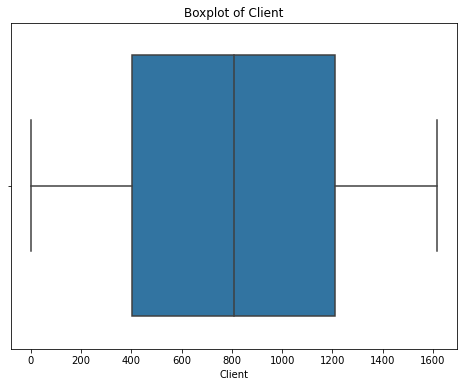

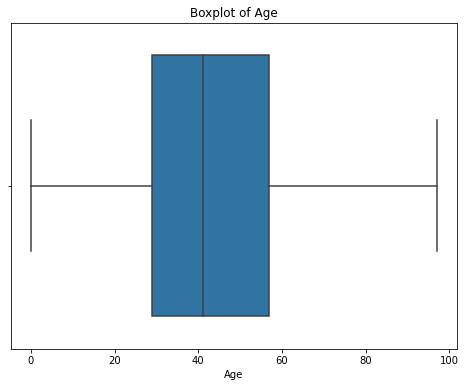

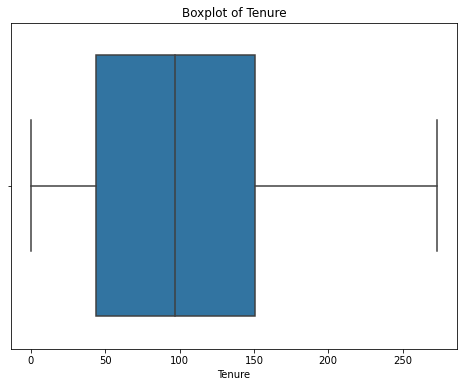

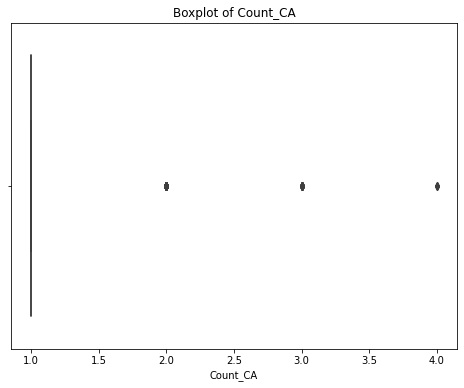

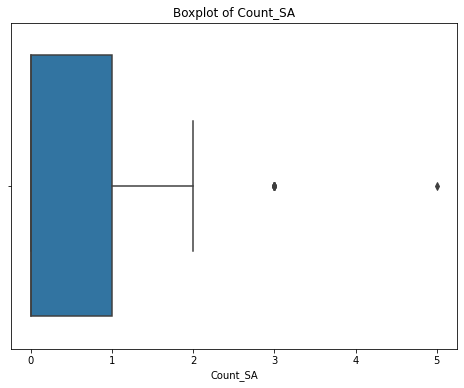

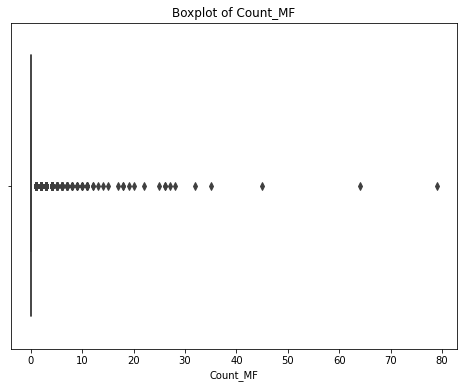

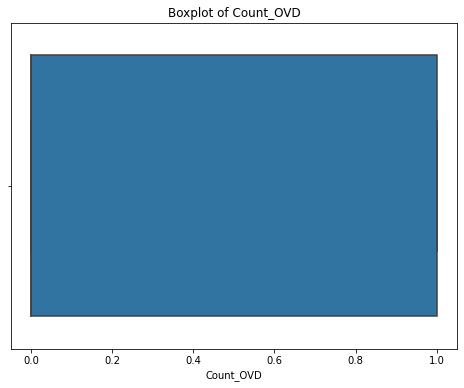

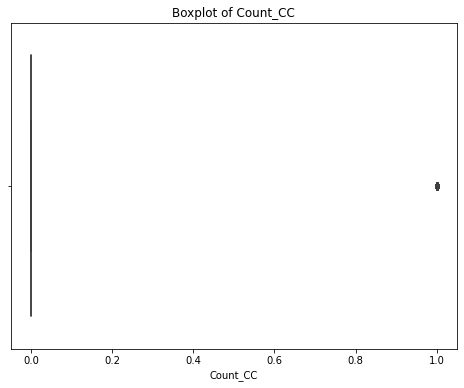

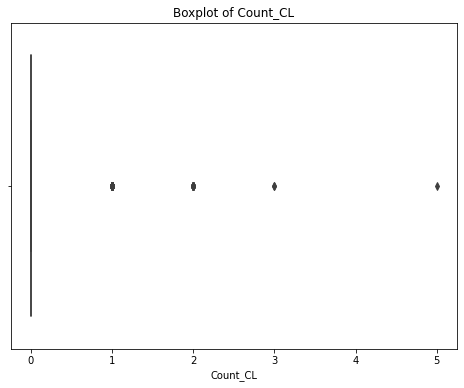

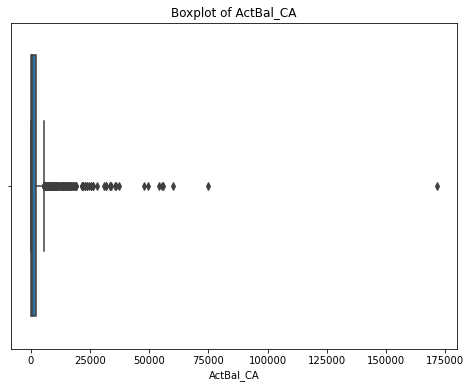

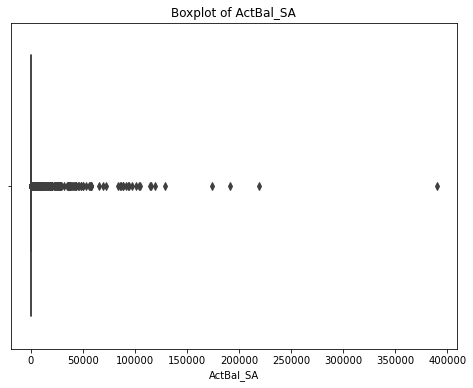

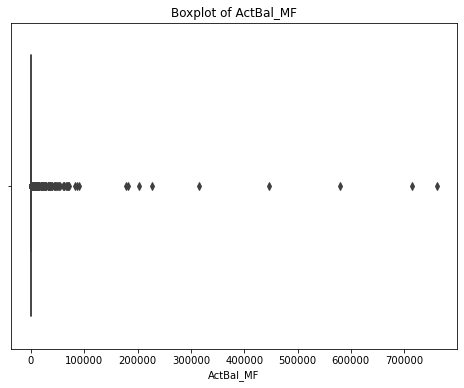

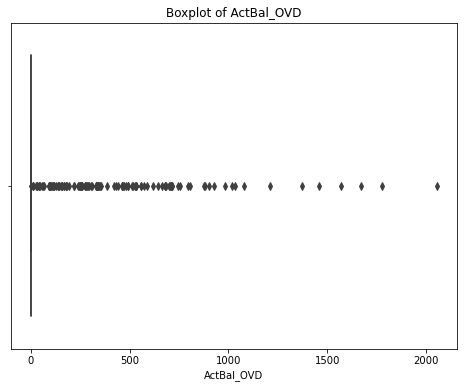

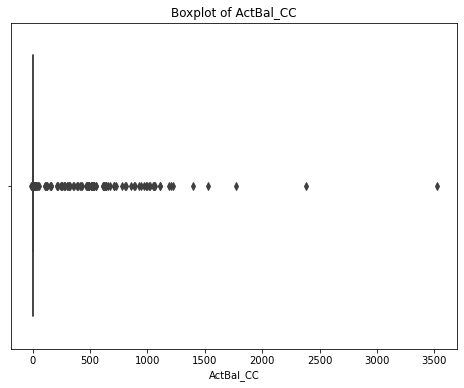

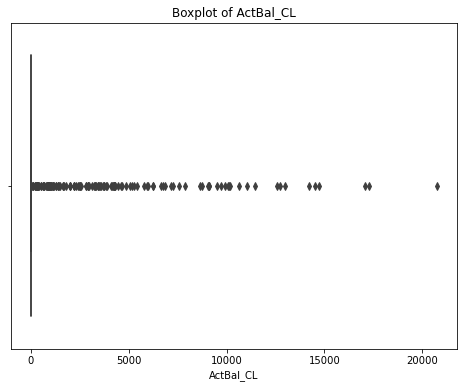

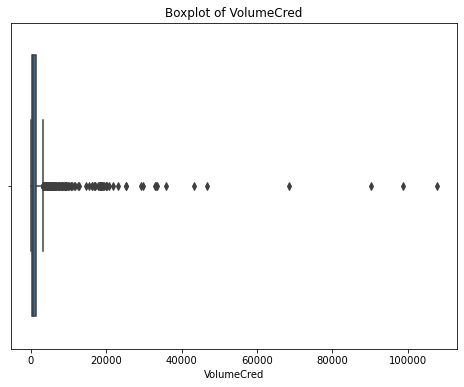

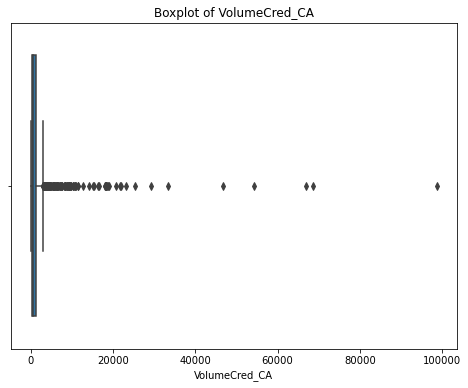

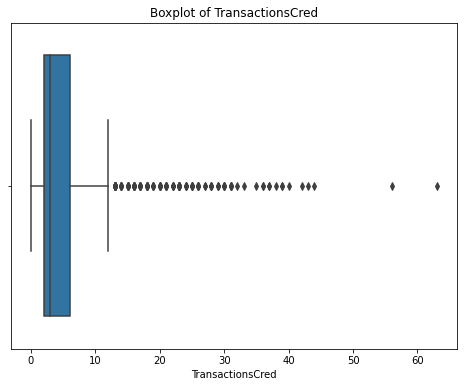

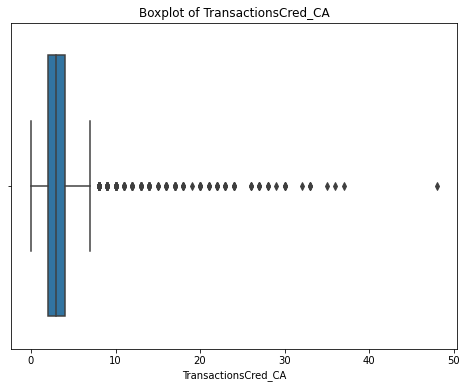

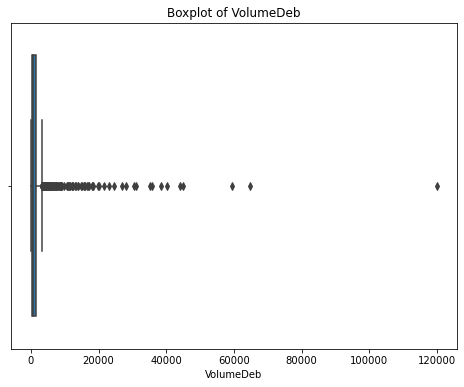

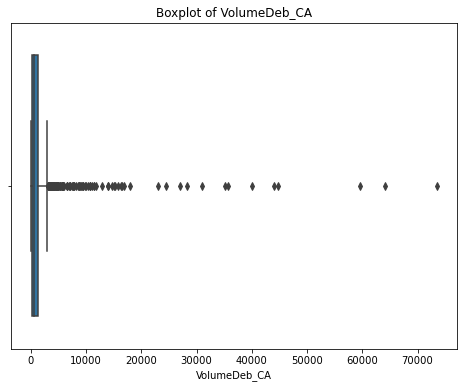

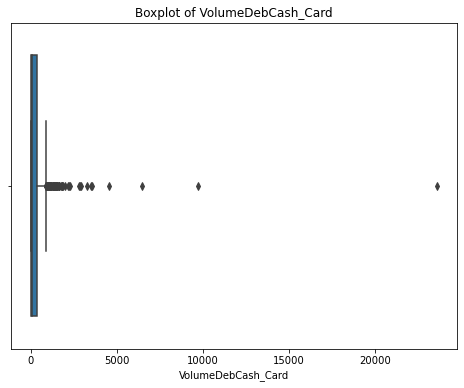

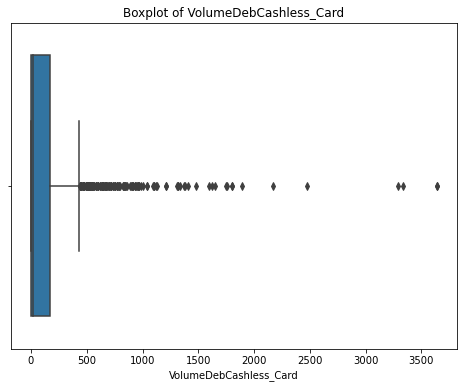

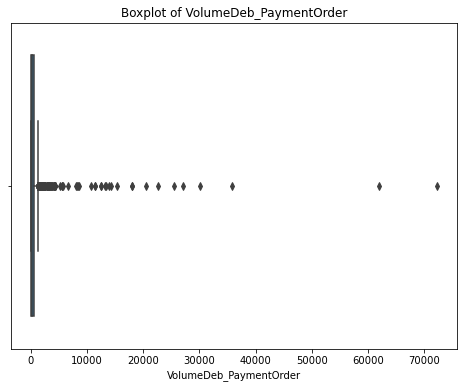

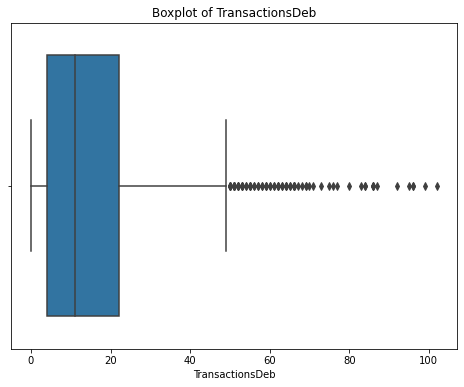

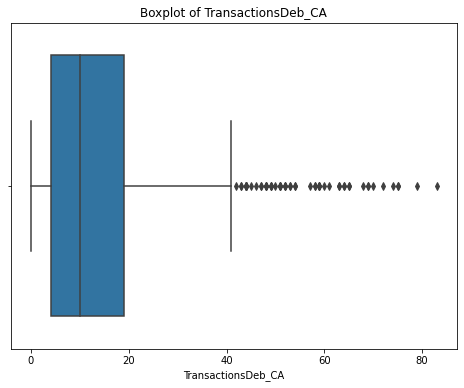

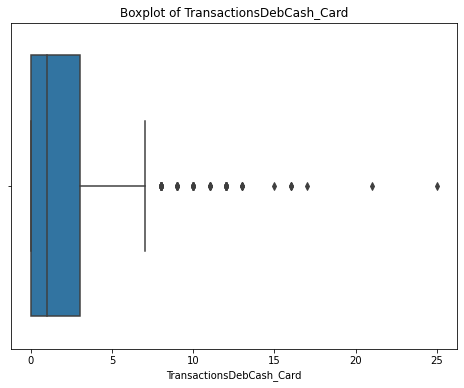

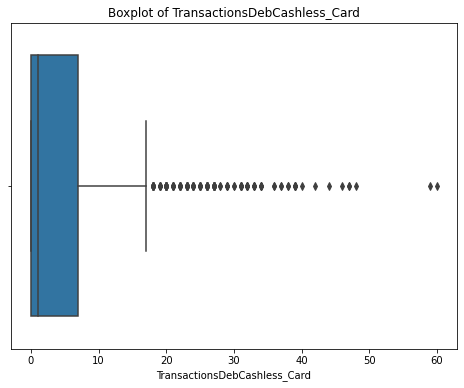

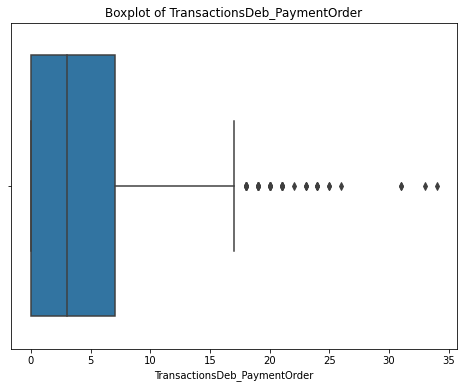

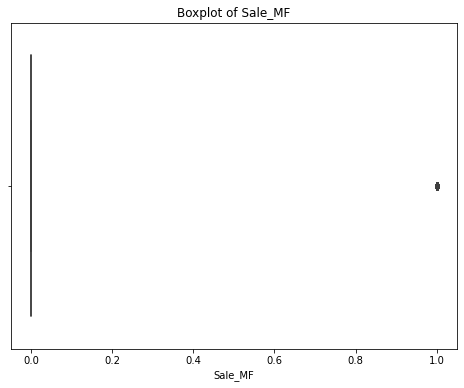

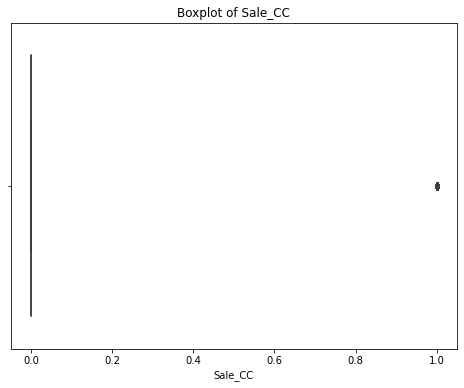

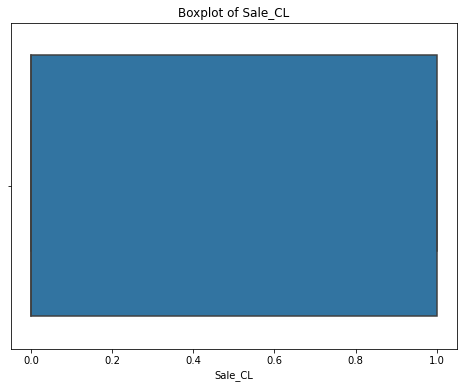

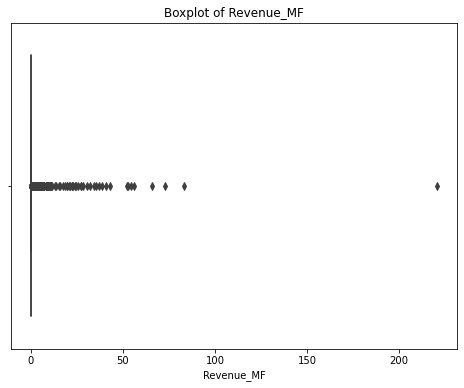

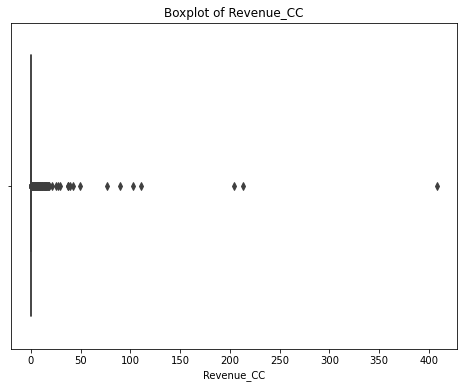

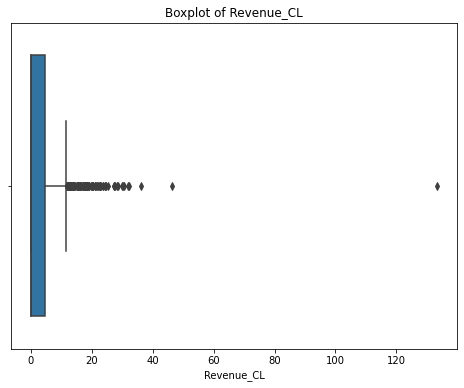

In [63]:
# Outlier detection and treatment
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [30]:
# Read sales_revenues_df separately
sales_revenues_df = pd.read_excel(excel_file, sheet_name='Sales_Revenues')

In [29]:
sales_revenues_df.head()

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1094,0,1,0,0.000000,5.138571,0.0000
1,1484,1,0,1,25.609107,0.000000,8.7225
2,20,0,1,0,0.000000,3.822500,0.0000
3,1193,0,0,0,0.000000,0.000000,0.0000
4,142,0,0,0,0.000000,0.000000,0.0000


# Propensity Model for each Target Variable
**Steps:**
1. Prepare train and test datasets by dividing dataset into 3 i.e. train, test and new. New set is the unlabelled target data.
2. Find correlation with the target variables in each case.
3. Select features with high correlation with the target variable.
4. Using SMOTE to balanced the classes, since class 0 has more data points than class 1.
5. Hyperparmeter tuning using GridSearchCV to find the best parameters
6. Train the Random Forrest model
7. Model evaluation using AUC-ROC, Precision and Recall
8. Prediction of class 1 for the clients in new dataset i.e. calculating Propensity Score
9. Ranking the clients in the descending order of their Propensity Score

# Propensity Model for Mutual Fund

In [31]:
# Compute the correlation of variables w.r.t. Sale_MF
correlation_Sale_MF = merged_df.corr()
correlation_Sale_MF.sort_values(["Sale_MF"], ascending = False, inplace = True)
print(correlation_Sale_MF.Sale_MF)

Sale_MF                         1.000000
Revenue_MF                      0.388389
Count_MF                        0.164993
TransactionsDebCashless_Card    0.129922
TransactionsDeb                 0.090371
TransactionsCred_CA             0.088573
TransactionsCred                0.081160
TransactionsDeb_CA              0.062577
Sex_encoded                     0.046756
TransactionsDeb_PaymentOrder    0.030198
ActBal_MF                       0.026076
VolumeCred_CA                   0.018487
ActBal_CC                       0.012711
Client                          0.011927
Revenue_CL                      0.006943
VolumeDebCashless_Card          0.005859
TransactionsDebCash_Card        0.005351
Count_CA                        0.003675
Count_CC                        0.000740
ActBal_OVD                      0.000470
VolumeCred                     -0.000598
Count_SA                       -0.001527
Count_OVD                      -0.005856
Tenure                         -0.006277
Sale_CL         

In [32]:
# Set the correlation threshold
threshold = 0.03  # You can adjust this threshold as needed

# Select features with correlation above the threshold for each target variable
selected_features = {}

# For Sale_MF
selected_features['Sale_MF'] = correlation_Sale_MF.index[(correlation_Sale_MF['Sale_MF'] > threshold) | (correlation_Sale_MF['Sale_MF'] < -threshold)].tolist()
print(selected_features['Sale_MF'])


['Sale_MF', 'Revenue_MF', 'Count_MF', 'TransactionsDebCashless_Card', 'TransactionsDeb', 'TransactionsCred_CA', 'TransactionsCred', 'TransactionsDeb_CA', 'Sex_encoded', 'TransactionsDeb_PaymentOrder', 'VolumeDeb', 'Age', 'ActBal_SA', 'ActBal_CA', 'Count_CL', 'ActBal_CL']


In [33]:
# Step 1: Tag each row based on presence in Sales_Revenues sheet
merged_df['tag'] = np.where(merged_df['Client'].isin(sales_revenues_df['Client']), 'train', 'new')                            

In [34]:
# Step 2: Split non-'new' clients into training and testing sets
train_mask_MF = (merged_df['tag'] == 'train')


In [35]:
from sklearn.model_selection import train_test_split

selected_features_MF = ['Client', 'Count_MF', 'TransactionsDebCashless_Card', 'TransactionsDeb', 'TransactionsCred_CA',
                        'TransactionsCred', 'TransactionsDeb_CA', 'Sex_encoded', 'TransactionsDeb_PaymentOrder', 
                        'Age', 'VolumeDeb', 'ActBal_SA', 'ActBal_CA', 'Count_CL', 'ActBal_CL']

x_train_MF, x_test_MF, y_train_MF, y_test_MF = train_test_split(merged_df[train_mask_MF][selected_features_MF],
                                                    merged_df[train_mask_MF]['Sale_MF'],
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=merged_df[train_mask_MF]['Sale_MF'])


In [36]:
# Creating dataset with unlabelled data
new = merged_df[~merged_df['Client'].isin(sales_revenues_df['Client'])].copy()

In [37]:
#Unlabelled dataset for Mutual FUnd
features = x_train_MF.columns
new_MF = new[features].copy()

In [38]:
x_train_MF_copy = x_train_MF.drop(columns=['Client'])
x_test_MF_copy = x_test_MF.drop(columns=['Client'])

In [39]:
x_train_MF.head()

,Client,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,Sex_encoded,TransactionsDeb_PaymentOrder,Age,VolumeDeb,ActBal_SA,ActBal_CA,Count_CL,ActBal_CL
725,113,0.0,2.0,12.0,4.0,7.0,9.0,0,0.0,43,241.990357,0.000000,50.780714,1.0,17300.489643
354,1397,0.0,0.0,5.0,1.0,1.0,5.0,1,2.0,18,276.658214,0.000000,2.623214,0.0,0.000000
1489,1178,0.0,0.0,18.0,7.0,10.0,18.0,1,15.0,69,391.868929,40400.516429,38.045000,0.0,0.000000
1044,1348,3.0,0.0,2.0,1.0,2.0,2.0,1,2.0,39,357.142857,3786.695000,5316.222857,0.0,0.000000
767,414,14.0,0.0,5.0,4.0,5.0,5.0,0,4.0,33,402.750000,714.149286,281.493571,0.0,0.000000


In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42)),
])

# Fit the pipeline on the training data and resample
x_train_resampled, y_train_resampled = pipeline.fit_resample(x_train_MF_copy, y_train_MF)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# We will try to see what the are the parameters in a RF, so that we can perform Grid Search

# Initialize RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state = 42)
from pprint import pprint
print ('Parameters currently in use:\n')
print (rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [131]:
# Specifying parameters for hypertuning

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' : ['gini', 'entropy']
} 

In [43]:
from sklearn.metrics import make_scorer, roc_auc_score, recall_score

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(x_train_resampled, y_train_resampled)
     
# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, ma

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, ma

[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s


[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] E

[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END crit

[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END crit

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END crit

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\lib\site

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [44]:
# Train the model with the best parameters
  
rf_smote = RandomForestClassifier(**best_params, class_weight='balanced', random_state = 42)
rf_smote.fit(x_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_MF = rf_smote.predict(x_test_MF_copy)
print(f"Classification Report for Sale_MF using SMOTE:")
print(classification_report(y_test_MF, y_pred_MF))
print(y_pred_MF)
print(y_test_MF)

Classification Report for Sale_MF using SMOTE:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       117
         1.0       0.39      0.24      0.30        29

    accuracy                           0.77       146
   macro avg       0.61      0.57      0.58       146
weighted avg       0.74      0.77      0.75       146

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
22      0.0
963     0.0
1587    0.0
1578    0.0
990     1.0
       ... 
180     0.0
961     0.0
902     0.0
1041    0.0
957     0.0
Name: Sale_MF, Length: 146, dtype: float64


In [45]:
# Interpretation - Feature Importance
feature_importance = pd.DataFrame({
        'Feature': x_train_resampled.columns,
        'Importance': rf_smote.feature_importances_
    })
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(f"Feature Importance for Sale_MF using SMOTE:")
print(feature_importance)

# Define the propensity_scores dictionary to store propensity scores for each target variable
propensity_scores = {}


    # Calculate propensity scores for the positive class (class 1)
propensity_scores['Sale_MF'] = rf_smote.predict_proba(x_test_MF_copy)[:, 1]

Feature Importance for Sale_MF using SMOTE:
                         Feature  Importance
8                            Age    0.115946
11                     ActBal_CA    0.108013
3            TransactionsCred_CA    0.106161
9                      VolumeDeb    0.103035
1   TransactionsDebCashless_Card    0.086189
7   TransactionsDeb_PaymentOrder    0.085850
4               TransactionsCred    0.083204
2                TransactionsDeb    0.079495
0                       Count_MF    0.077310
5             TransactionsDeb_CA    0.077036
10                     ActBal_SA    0.039220
6                    Sex_encoded    0.019385
13                     ActBal_CL    0.010712
12                      Count_CL    0.008444


In [46]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class (class 1) on the test data
Y_probabilities = rf_smote.predict_proba(x_test_MF_copy)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test_MF, Y_probabilities)
print("AUC Score:", auc_score)

AUC Score: 0.4669908635425877


In [47]:
x_test_MF.head()

,Client,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,Sex_encoded,TransactionsDeb_PaymentOrder,Age,VolumeDeb,ActBal_SA,ActBal_CA,Count_CL,ActBal_CL
22,1574,0.0,0.0,1.0,1.0,1.0,1.0,0,0.0,30,0.893929,0.000000,478.543571,0.0,0.0
963,1154,0.0,6.0,11.0,2.0,2.0,11.0,1,3.0,82,269.603571,0.000000,10.644643,0.0,0.0
1587,162,0.0,0.0,6.0,2.0,2.0,6.0,0,3.0,51,380.785714,0.000000,1.964643,0.0,0.0
1578,1367,0.0,1.0,18.0,4.0,5.0,18.0,0,11.0,38,1832.178571,39664.086071,0.000000,0.0,0.0
990,777,0.0,20.0,36.0,8.0,8.0,36.0,0,10.0,16,1372.870000,0.000000,484.564643,0.0,0.0


# Which clients have higher propensity to buy Mutual Fund?

In [48]:
# Calculating propensity scores for the new customers buying Mutual Fund

propensity_scores_MF = {}

    # Calculate propensity scores for the positive class (class 1)
propensity_scores_MF['Sale_MF'] = rf_smote.predict_proba(new_MF.drop(columns = ['Client']))[:, 1]

# Combine client ID, target variable, and propensity scores into a DataFrame
data_MF = {
    'Client ID': new_MF['Client'],  # Assuming 'Client ID' is the column name
    'Target Variable': 'Sale_MF',  # Assuming we are focusing on Sale_MF
    'Propensity Score': propensity_scores_MF['Sale_MF']  # Assuming propensity_scores contains scores for Sale_MF
}
df_MF = pd.DataFrame(data_MF)

# Filter the DataFrame based on the target variable and propensity score threshold
target_variable = 'Sale_MF'  # Change this to Sale_CC or Sale_MF for other target variables
threshold = 0.5
filtered_df = df_MF[(df_MF['Target Variable'] == target_variable) & (df_MF['Propensity Score'] > threshold)]

# Sort the DataFrame by propensity score in descending order
filtered_df_sorted = filtered_df.sort_values(by='Propensity Score', ascending=False)
filtered_df_sorted.head(30)

,Client ID,Target Variable,Propensity Score
132,1440,Sale_MF,0.923333
973,1008,Sale_MF,0.860000
561,30,Sale_MF,0.843333
1563,559,Sale_MF,0.840000
197,1516,Sale_MF,0.836667
790,1200,Sale_MF,0.810000
758,1242,Sale_MF,0.793333
1008,1229,Sale_MF,0.786667
335,121,Sale_MF,0.776667
1155,965,Sale_MF,0.773333


In [137]:
filtered_df_sorted.to_csv('filtered_df_sorted.csv', index=False)

# Propensity Model for Credit Card

In [49]:
# Compute the correlation of variables w.r.t. Sale_CC
correlation_Sale_CC = merged_df.corr()
correlation_Sale_CC.sort_values(["Sale_CC"], ascending = False, inplace = True)
print(correlation_Sale_CC.Sale_CC)

Sale_CC                         1.000000
Revenue_CC                      0.265885
ActBal_SA                       0.176878
ActBal_CA                       0.166340
Count_SA                        0.106517
VolumeDeb_PaymentOrder          0.077699
TransactionsDebCash_Card        0.065856
Revenue_CL                      0.057624
VolumeDeb                       0.054899
Age                             0.048768
VolumeDeb_CA                    0.047927
Count_OVD                       0.045248
TransactionsCred                0.032055
Tenure                          0.017929
VolumeCred                      0.014716
TransactionsCred_CA             0.006586
Client                         -0.001371
TransactionsDeb                -0.001601
Revenue_MF                     -0.001846
VolumeCred_CA                  -0.002930
VolumeDebCash_Card             -0.009669
Sex_encoded                    -0.010115
Count_CC                       -0.011060
TransactionsDeb_CA             -0.011107
TransactionsDeb_

In [50]:
# Set the correlation threshold
threshold = 0.03  # You can adjust this threshold as needed

# Select features with correlation above the threshold for each target variable
selected_features = {}

# For Sale_CC
selected_features['Sale_CC'] = correlation_Sale_CC.index[(correlation_Sale_CC['Sale_CC'] > threshold) | (correlation_Sale_CC['Sale_CC'] < -threshold)].tolist()
print(selected_features['Sale_CC'])

['Sale_CC', 'Revenue_CC', 'ActBal_SA', 'ActBal_CA', 'Count_SA', 'VolumeDeb_PaymentOrder', 'TransactionsDebCash_Card', 'Revenue_CL', 'VolumeDeb', 'Age', 'VolumeDeb_CA', 'Count_OVD', 'TransactionsCred', 'Count_CA', 'ActBal_CL', 'TransactionsDebCashless_Card', 'Count_CL']


In [51]:
selected_features_CC = ['Client',  'ActBal_SA', 'ActBal_CA', 'Count_SA', 'VolumeDeb_PaymentOrder', 
                        'TransactionsDebCash_Card', 'VolumeDeb', 'Age', 'VolumeDeb_CA', 
                        'Count_OVD', 'TransactionsCred', 'Count_CA', 'ActBal_CL', 'TransactionsDebCashless_Card', 'Count_CL']

x_train_CC, x_test_CC, y_train_CC, y_test_CC = train_test_split(merged_df[train_mask_MF][selected_features_CC],
                                                    merged_df[train_mask_MF]['Sale_CC'],
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=merged_df[train_mask_MF]['Sale_CC'])

x_train_CC_copy = x_train_CC.drop(columns=['Client'])
x_test_CC_copy = x_test_CC.drop(columns=['Client'])


# Create the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42)),
])

# Fit the pipeline on the training data and resample
x_train_CC_resampled, y_train_CC_resampled = pipeline.fit_resample(x_train_CC_copy, y_train_CC)

In [52]:
#Unlabelled dataset for Credit Card
features = x_train_CC.columns
new_CC = new[features].copy()

In [53]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='recall', verbose=2)
grid_search.fit(x_train_CC_resampled, y_train_CC_resampled)
     
# Get the best parameters
best_params = grid_search.best_params_
print(best_params)


# Train the model with the best parameters
  
rf_smote_CC = RandomForestClassifier(**best_params, class_weight='balanced', random_state = 42)
rf_smote_CC.fit(x_train_CC_resampled, y_train_CC_resampled)

# Evaluate the model
y_pred_CC = rf_smote_CC.predict(x_test_CC_copy)
print(f"Classification Report for Sale_CC using SMOTE:")
print(classification_report(y_test_CC, y_pred_CC))
print(y_pred_CC)
print(y_test_CC)

# Interpretation - Feature Importance
feature_importance = pd.DataFrame({
        'Feature': x_train_CC_resampled.columns,
        'Importance': rf_smote_CC.feature_importances_
    })
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(f"Feature Importance for Sale_CC:")
print(feature_importance)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_dep

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=10, ma

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END criterion=gini, max_depth=10, ma

[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_dep

[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s

[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] 

[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] E

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END crit

[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterio

[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criter

[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=i

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\lib\site

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Sale_CC using SMOTE:
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       110
         1.0       0.62      0.28      0.38        36

    accuracy                           0.78       146
   macro avg       0.71      0.61      0.63       146
weighted avg       0.76      0.78      0.75       146

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
58      1.0
1574    0.0
394     0.0
398     0.0

In [54]:
# Predict probabilities for the positive class (class 1) on the test data
Y_probabilities = rf_smote_CC.predict_proba(x_test_CC_copy)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test_CC, Y_probabilities)
print("AUC Score:", auc_score)

AUC Score: 0.6630050505050504


# Which clients have higher propensity to buy Consumer Loan?

In [55]:
# Define the propensity_scores dictionary to store propensity scores for each target variable
propensity_scores_CC = {}


    # Calculate propensity scores for the positive class (class 1)
propensity_scores_CC['Sale_CC'] = rf_smote_CC.predict_proba(new_CC.drop(columns = ['Client']))[:, 1]

# Combine client ID, target variable, and propensity scores into a DataFrame
data_CC = {
    'Client ID': new_CC['Client'],  # Assuming 'Client ID' is the column name
    'Target Variable': 'Sale_CC',  # Assuming we are focusing on Sale_CC
    'Propensity Score': propensity_scores_CC['Sale_CC']  # Assuming propensity_scores contains scores for Sale_CC
}
df_CC = pd.DataFrame(data_CC)

# Filter the DataFrame based on the target variable and propensity score threshold
target_variable = 'Sale_CC'  # Change this to Sale_CC or Sale_MF for other target variables
threshold = 0.5
filtered_df = df_CC[(df_CC['Target Variable'] == target_variable) & (df_CC['Propensity Score'] > threshold)]

# Sort the DataFrame by propensity score in descending order
filtered_df_sorted_CC = filtered_df.sort_values(by='Propensity Score', ascending=False)
filtered_df_sorted_CC.head(30)

,Client ID,Target Variable,Propensity Score
135,19,Sale_CC,0.930
1130,151,Sale_CC,0.925
786,1262,Sale_CC,0.920
703,197,Sale_CC,0.915
1133,727,Sale_CC,0.915
1381,1487,Sale_CC,0.915
715,587,Sale_CC,0.910
829,592,Sale_CC,0.900
529,352,Sale_CC,0.890
539,579,Sale_CC,0.890


In [136]:
filtered_df_sorted_CC.to_csv('filtered_df_sorted_CC.csv', index=False)

# Propensity Model for Consumer Loan

In [56]:
#Compute the correlation of variables w.r.t. Sale_CL
correlation_Sale_CL = merged_df.corr()
correlation_Sale_CL.sort_values(["Sale_CL"], ascending = False, inplace = True)
print(correlation_Sale_CL.Sale_CL)

Sale_CL                         1.000000
Revenue_CL                      0.712570
Tenure                          0.177345
TransactionsCred_CA             0.092394
TransactionsCred                0.090906
Count_CA                        0.084619
TransactionsDebCash_Card        0.082213
TransactionsDeb                 0.077161
ActBal_MF                       0.074075
TransactionsDeb_CA              0.074017
ActBal_OVD                      0.067968
VolumeDeb                       0.064772
TransactionsDeb_PaymentOrder    0.057079
Count_CL                        0.054304
VolumeDeb_PaymentOrder          0.053348
ActBal_CL                       0.052295
Client                          0.046492
Count_MF                        0.045515
VolumeDeb_CA                    0.042784
VolumeDebCashless_Card          0.041211
Count_OVD                       0.040541
Count_SA                        0.036352
TransactionsDebCashless_Card    0.020377
VolumeDebCash_Card              0.018157
Revenue_MF      

In [57]:
#Set the correlation threshold
threshold = 0.05  # You can adjust this threshold as needed

#Select features with correlation above the threshold for each target variable
selected_features = {}

#For Sale_CL
selected_features['Sale_CL'] = correlation_Sale_CL.index[(correlation_Sale_CL['Sale_CL'] > threshold) | (correlation_Sale_CL['Sale_CL'] < -threshold)].tolist()
print(selected_features['Sale_CL'])

['Sale_CL', 'Revenue_CL', 'Tenure', 'TransactionsCred_CA', 'TransactionsCred', 'Count_CA', 'TransactionsDebCash_Card', 'TransactionsDeb', 'ActBal_MF', 'TransactionsDeb_CA', 'ActBal_OVD', 'VolumeDeb', 'TransactionsDeb_PaymentOrder', 'Count_CL', 'VolumeDeb_PaymentOrder', 'ActBal_CL', 'ActBal_CA', 'ActBal_CC', 'Age']


In [58]:
selected_features_CL = ['Client', 'Tenure', 'TransactionsCred_CA', 'TransactionsCred', 'Count_CA', 
                        'TransactionsDebCash_Card', 'TransactionsDeb', 'ActBal_MF', 'TransactionsDeb_CA',
                        'ActBal_OVD', 'VolumeDeb', 'TransactionsDeb_PaymentOrder', 'Count_CL', 'VolumeDeb_PaymentOrder', 
                        'ActBal_CL', 'ActBal_CA', 'ActBal_CC', 'Age']

x_train_CL, x_test_CL, y_train_CL, y_test_CL = train_test_split(merged_df[train_mask_MF][selected_features_CL],
                                                    merged_df[train_mask_MF]['Sale_CL'],
                                                    test_size=0.15,
                                                    random_state=42,
                                                    stratify=merged_df[train_mask_MF]['Sale_CL'])

x_train_CL_copy = x_train_CL.drop(columns=['Client'])
x_test_CL_copy = x_test_CL.drop(columns=['Client'])


# Create the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42)),
])


# Fit the pipeline on the training data and resample
x_train_CL_resampled, y_train_CL_resampled = pipeline.fit_resample(x_train_CL_copy, y_train_CL)

In [59]:
#Unlabelled dataset for Consumer Loan
features = x_train_CL.columns
new_CL = new[features].copy()

In [60]:

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(x_train_CL_resampled, y_train_CL_resampled)
     
# Get the best parameters
best_params = grid_search.best_params_
print(best_params)


# Train the model with the best parameters
  
rf_smote_CL = RandomForestClassifier(**best_params, class_weight='balanced', random_state = 42)
rf_smote_CL.fit(x_train_CL_resampled, y_train_CL_resampled)

    # Evaluate the model
y_pred_CL = rf_smote_CL.predict(x_test_CL_copy)
print(f"Classification Report for Sale_CL:")
print(classification_report(y_test_CL, y_pred_CL))
print(y_pred_CL)
print(y_test_CL)

# Interpretation - Feature Importance
feature_importance = pd.DataFrame({
        'Feature': x_train_CL_resampled.columns,
        'Importance': rf_smote_CL.feature_importances_
    })
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(f"Feature Importance for Sale_CL using SMOTE:")
print(feature_importance)


# Predict probabilities for the positive class (class 1) on the test data
Y_probabilities = rf_smote_CL.predict_proba(x_test_CL_copy)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test_CL, Y_probabilities)
print("AUC Score:", auc_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, ma

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, ma

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, ma

[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END criterion=gini, max_depth=20, max_featu

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] E

[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] E

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END crit

[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criter

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END criterion=i

[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END criterion=impurity, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END crit

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\lib\site

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report for Sale_CL:
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       102
         1.0       0.44      0.36      0.40        44

    accuracy                           0.67       146
   macro avg       0.59      0.58      0.59       146
weighted avg       0.65      0.67      0.66       146

[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0.]
600     1.0
429     0.0
710     0.0
604     0.0
239     0.0
 

# Which clients have higher propensity to buy Consumer Loan?

In [61]:
# Define the propensity_scores dictionary to store propensity scores for each target variable
propensity_scores_CL = {}


    # Calculate propensity scores for the positive class (class 1)
propensity_scores_CL['Sale_CL'] = rf_smote_CL.predict_proba(new_CL.drop(columns = ['Client']))[:, 1]

# Combine client ID, target variable, and propensity scores into a DataFrame
data_CL = {
    'Client ID': new_CL['Client'],  # Assuming 'Client ID' is the column name
    'Target Variable': 'Sale_CL',  # Assuming we are focusing on Sale_CL
    'Propensity Score': propensity_scores_CL['Sale_CL']  # Assuming propensity_scores contains scores for Sale_CL
}
df_CL = pd.DataFrame(data_CL)

# Filter the DataFrame based on the target variable and propensity score threshold of 0.50
target_variable = 'Sale_CL'  
threshold = 0.5
filtered_df = df_CL[(df_CL['Target Variable'] == target_variable) & (df_CL['Propensity Score'] > threshold)]

# Sort the DataFrame by propensity score in descending order
filtered_df_sorted_CL = filtered_df.sort_values(by='Propensity Score', ascending=False)
filtered_df_sorted_CL.head(30)

,Client ID,Target Variable,Propensity Score
1303,1082,Sale_CL,0.913333
636,545,Sale_CL,0.883333
259,61,Sale_CL,0.874815
701,1597,Sale_CL,0.873333
1408,498,Sale_CL,0.866667
869,1122,Sale_CL,0.859231
1040,1192,Sale_CL,0.853333
247,342,Sale_CL,0.816667
686,1097,Sale_CL,0.815833
1450,731,Sale_CL,0.813333


In [135]:
filtered_df_sorted_CL.to_csv('filtered_df_sorted_CL.csv', index=False)

**We will still test other models to check and compare the performance**

Other Models used:
1. xgboost
2. SVM
3. NB Classifier
4. NN - MLP Classifier
5. Ensembling - logistic regression with random forrest    

Overall, RF model with SMOTE gave better accuracy.

In [89]:
import xgboost as xgb


#Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(x_train_resampled, y_train_resampled)

# Evaluate the model on the test set
Y_pred_XGB_MF = xgb_clf.predict(x_test_MF_copy)
print("Classification Report for Sale_CL (XGBoost):")
print(classification_report(y_test_MF, Y_pred_XGB_MF))

# Predict probabilities for the positive class (class 1) on the test data
Y_probabilities = xgb_clf.predict_proba(x_test_MF_copy)[:, 1]

# Calculate the AUC score
auc_score_xgb = roc_auc_score(y_test_MF, Y_probabilities)
print("AUC Score:", auc_score)

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [01:19:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for Sale_CL (XGBoost):
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       117
         1.0       0.23      0.17      0.20        29

    accuracy                           0.72       146
   macro avg       0.52      0.51      0.51       146
weighted avg       0.69      0.72      0.70       146

AUC Score: 0.6609848484848485


We will try to use xgboost with best parameters and calculate the auc score to see how the model performs in comparison.

In [111]:
#Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train_resampled, y_train_resampled)

# Predict probabilities
propensity_scores_NB = nb_classifier.predict_proba(x_test_MF_copy)[:, 1]

# Evaluate Naive Bayes model
nb_auc = roc_auc_score(y_test_MF, propensity_scores_NB)
print("AUC for Naive Bayes:", nb_auc)

y_pred_MF_NB = nb_classifier.predict(x_test_MF_copy)
print(f"Classification Report for Sale_MF using NB:")
print(classification_report(y_test_MF, y_pred_MF))


AUC for Naive Bayes: 0.5089890951959917
Classification Report for Sale_MF using NB:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       117
         1.0       0.39      0.24      0.30        29

    accuracy                           0.77       146
   macro avg       0.61      0.57      0.58       146
weighted avg       0.74      0.77      0.75       146



In [112]:
#Support Vector Machine
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(probability=True)

# Train the model
svm_classifier.fit(x_train_resampled, y_train_resampled)

# Predict probabilities
propensity_scores_SVM = svm_classifier.predict_proba(x_train_resampled)[:, 1]

# Evaluate SVM model
svm_auc = roc_auc_score(y_train_resampled, propensity_scores_SVM)
print("AUC for SVM:", svm_auc)

y_pred_MF_SVM = svm_classifier.predict(x_test_MF_copy)
print(f"Classification Report for Sale_MF using SVM:")
print(classification_report(y_test_MF, y_pred_MF))

AUC for SVM: 0.6100612276383263
Classification Report for Sale_MF using SVM:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       117
         1.0       0.39      0.24      0.30        29

    accuracy                           0.77       146
   macro avg       0.61      0.57      0.58       146
weighted avg       0.74      0.77      0.75       146



In [113]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

# Initialize the neural network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500)

# Train the model
nn_classifier.fit(x_train_resampled, y_train_resampled)

# Predict probabilities
propensity_scores_NN = nn_classifier.predict_proba(x_test_MF_copy)[:, 1]

# Evaluate Neural Network model
nn_auc = roc_auc_score(y_test_MF, propensity_scores_NN)
print("AUC for Neural Network:", nn_auc)

# Classification report
y_pred_MF_SVM = nn_classifier.predict(x_test_MF_copy)
print(f"Classification Report for Sale_MF using NN - MLN:")
print(classification_report(y_test_MF, y_pred_MF))

AUC for Neural Network: 0.5549661066902446
Classification Report for Sale_MF using NN - MLN:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       117
         1.0       0.39      0.24      0.30        29

    accuracy                           0.77       146
   macro avg       0.61      0.57      0.58       146
weighted avg       0.74      0.77      0.75       146



In [107]:
#USING ENSEMBLING for class Sale_MF with logistic Regression and Random Forrest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Initialize individual models
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42)

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='soft')

# Train the ensemble model
ensemble_model.fit(x_train_resampled, y_train_resampled)

# Predict on test data
y_pred_MF_ensemble = ensemble_model.predict(x_test_MF_copy)

# Evaluate the ensemble model
print("Classification Report for Sale_MF using Ensemble (Averaging):")
print(classification_report(y_test_MF, y_pred_MF_ensemble))

Classification Report for Sale_MF using Ensemble (Averaging):
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       117
         1.0       0.30      0.31      0.31        29

    accuracy                           0.72       146
   macro avg       0.56      0.57      0.56       146
weighted avg       0.72      0.72      0.72       146



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicting the revenue using the train model
In this section, we will try to predict the revenue of the model by using Random Forrest Regression to find the feature importance and then using Recursive Feature Elimination with Cross-Validation to select features.

In [152]:
merged_df.columns

Index(['Client', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Sex_encoded', 'tag'],
      dtype='object')

In [63]:
# Selecting features for Predicting Revenue
features_revenue = ['Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder']



In [64]:
# Filter merged_df based on the tag column 'train'
pred = merged_df[merged_df['tag'] == 'train'].copy()

# Drop the tag column if needed
pred.drop(columns=['tag'], inplace=True)

In [65]:
X = pred[features_revenue]

In [66]:
X.head()

,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
1,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,...,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0
2,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,...,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0
3,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,...,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
4,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,16,187,1,0.0,0.0,1.0,0.0,0.0,345.686071,0.000000,...,130.521429,130.521429,0.000000,111.235714,19.285714,5.0,5.0,0.0,4.0,1.0


In [67]:
# Here, we split the data 'train' into training and testing for modelling
y_revenue_cc = pred['Revenue_CC']
y_revenue_mf = pred['Revenue_MF']
y_revenue_cl = pred['Revenue_CL']

# Splitting data into train and test sets
X_train, X_test, y_train_cc, y_test_cc = train_test_split(X, y_revenue_cc, test_size=0.15, random_state=42)
X_train, X_test, y_train_mf, y_test_mf = train_test_split(X, y_revenue_mf, test_size=0.15, random_state=42)
X_train, X_test, y_train_cl, y_test_cl = train_test_split(X, y_revenue_cl, test_size=0.15, random_state=42)

In [68]:
# We will find the feature importance using RF regressor to select the features for training
from sklearn.ensemble import RandomForestRegressor
selected_features_list = list(selected_features.keys())

# Feature Importance using RandomForestRegressor
rf_cc = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None,
                              min_samples_split=5, min_samples_leaf=1, max_features=3, bootstrap=True, criterion='squared_error')
rf_cc.fit(X_train, y_train_cc)

rf_mf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, 
                              min_samples_leaf=5, max_features=3, bootstrap=True, criterion='squared_error')
rf_mf.fit(X_train, y_train_mf)

rf_cl = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, 
                              min_samples_leaf=5, max_features=3, bootstrap=True, criterion='squared_error')
rf_cl.fit(X_train, y_train_cl)

# Feature Importances for Revenue_CC
feature_importance_cc = pd.Series(rf_cc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature Importances for Revenue_MF
feature_importance_mf = pd.Series(rf_mf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature Importances for Revenue_CL
feature_importance_cl = pd.Series(rf_cl.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance for Revenue_CC:\n", feature_importance_cc)
print("\nFeature Importance for Revenue_MF:\n", feature_importance_mf)
print("\nFeature Importance for Revenue_CL:\n", feature_importance_cl)


Correlation with Revenue_CC:
 Revenue_CC    1.000000
Sale_CL      -0.004015
Name: Revenue_CC, dtype: float64

Correlation with Revenue_MF:
 Revenue_MF    1.000000
Sale_CL       0.015414
Name: Revenue_MF, dtype: float64

Correlation with Revenue_CL:
 Revenue_CL    1.00000
Sale_CL       0.71257
Name: Revenue_CL, dtype: float64

Feature Importance for Revenue_CC:
 Tenure                          0.138413
TransactionsCred_CA             0.068459
Age                             0.065653
TransactionsDeb                 0.061354
VolumeDeb                       0.060819
VolumeDeb_PaymentOrder          0.058253
VolumeCred                      0.055960
ActBal_CA                       0.055264
TransactionsDeb_CA              0.053643
VolumeCred_CA                   0.053016
TransactionsCred                0.046140
TransactionsDebCash_Card        0.037040
VolumeDeb_CA                    0.035414
VolumeDebCashless_Card          0.030272
TransactionsDebCashless_Card    0.028600
TransactionsDeb_Payme

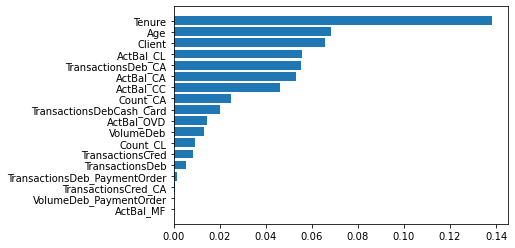

In [227]:
# Plot of feature importance for Credit Card
f_i = list(zip(features,rf_cc.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

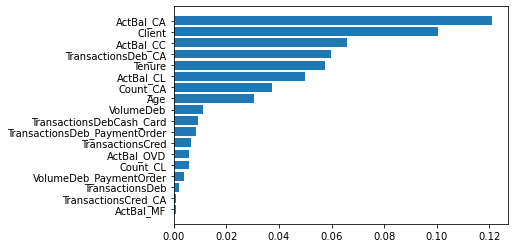

In [176]:
# Plot of feature importance for Mutual Fund

f_i = list(zip(features,rf_mf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

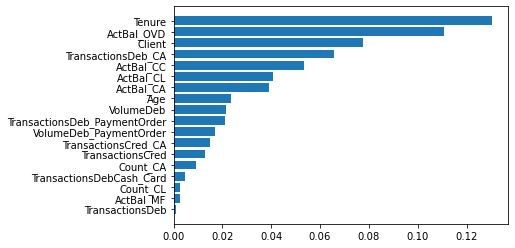

In [177]:
# Plot of feature importance for Consumer Loan

f_i = list(zip(features,rf_cl.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [69]:
Recursive Feature Elimination using CV

from sklearn.feature_selection import RFECV

rfe_cc = RFECV(rf_cc,cv=5,scoring="neg_mean_squared_error")
rfe_cc.fit(X_train,y_train_cc)

rfe_cl = RFECV(rf_cl,cv=5,scoring="neg_mean_squared_error")
rfe_cl.fit(X_train,y_train_cl)

rfe_mf = RFECV(rf_mf,cv=5,scoring="neg_mean_squared_error")
rfe_mf.fit(X_train,y_train_mf)


RFECV(cv=5,
      estimator=RandomForestRegressor(max_features=3, min_samples_leaf=5,
                                      random_state=42),
      scoring='neg_mean_squared_error')

In [70]:
# Get selected features for credit card
top_features_cc = X_train.columns[rfe_cc.support_]

# Get feature rankings for credit card
top_rankings_cc = rfe_cc.ranking_

# Print selected features and rankings for credit card
print("Selected features for Revenue_CC:", top_features_cc)
print("Feature rankings for Revenue_CC:", top_rankings_cc)

# Get selected features consumer loan
top_features_cl = X_train.columns[rfe_cl.support_]

# Get feature rankings consumer loan
top_rankings_cl = rfe_cl.ranking_

# Print selected features and rankings consumer loan
print("Selected features for Revenue_CL:", top_features_cl)
print("Feature rankings for Revenue_CL:", top_rankings_cl)

# Get selected features mutual fund
top_features_mf = X_train.columns[rfe_mf.support_]

# Get feature rankings mutual fund
top_rankings_mf = rfe_mf.ranking_

# Print selected features and rankings mutual fund
print("Selected features for Revenue_MF:", top_features_mf)
print("Feature rankings for Revenue_MF:", top_rankings_mf)



Selected features for Revenue_CC: Index(['Age', 'Tenure', 'Count_MF', 'Count_OVD', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_CC', 'VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card'],
      dtype='object')
Feature rankings for Revenue_CC: [1 1 5 4 1 1 3 8 1 1 1 6 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
Selected features for Revenue_CL: Index(['Age', 'Tenure', 'VolumeCred_CA', 'VolumeDeb',
       'VolumeDeb_PaymentOrder'],
      dtype='object')
Feature rankings for Revenue_CL: [ 1  1 17 18 20 21 24 22  3  6 19 16 23 15  4  1 10 13  1  2  9  8  1  7
  5 12 14 11]
Selected features for Revenue_MF: Index(['Age', 'Tenure', 'ActBal_CA', 'VolumeCred', 'VolumeCred_CA',
       'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCashless_Card',
       'Tr

In [73]:
from sklearn.metrics import mean_squared_error

# Model evaluation
y_pred_cc = rfe_cc.predict(X_test)
mse_score_cc = mean_squared_error(y_test_cc, y_pred_cc)
print("MSE score for Revenue_CC:", mse_score_cc)

y_pred_cl = rfe_cl.predict(X_test)
mse_score_cl = mean_squared_error(y_test_cl, y_pred_cl)
print("MSE score for Revenue_CL:", mse_score_cl)

y_pred_mf = rfe_mf.predict(X_test)
mse_score_mf = mean_squared_error(y_test_mf, y_pred_mf)
print("MSE score for Revenue_MF:", mse_score_mf)

rmse_cc = np.sqrt(mse_score_cc)
rmse_cl = np.sqrt(mse_score_cl)
rmse_mf = np.sqrt(mse_score_mf)

print("RMSE score for Revenue_CC:", rmse_cc)
print("RMSE score for Revenue_CL:", rmse_cl)
print("RMSE score for Revenue_MF:", rmse_mf)


MSE score for Revenue_CC: 41.475580614091015
MSE score for Revenue_CL: 42.51283772384583
MSE score for Revenue_MF: 90.22658813942122
RMSE score for Revenue_CC: 6.4401537725500795
RMSE score for Revenue_CL: 6.520186939332785
RMSE score for Revenue_MF: 9.49876771688945


In [ ]:
columns_new_mf = ['Client','Age', 'Tenure', 'ActBal_CA', 'VolumeCred', 'VolumeCred_CA',
       'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCashless_Card',
       'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDeb_PaymentOrder']
new_mf = new[columns_new_mf]
new_mf_without_column = new_mf.drop(columns = ['Client'])

In [74]:
new_set = merged_df[merged_df['tag'] == 'new'].copy()

newdf = new_set[features_revenue]

,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.0,...,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
6,37,175,1,0.0,4.0,1.0,0.0,0.0,1823.057143,0.0,...,661.483214,566.126071,89.285714,0.000000,216.892857,13.0,10.0,2.0,0.0,5.0
9,19,70,1,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,...,390.056429,390.056429,125.000000,70.842143,190.821429,10.0,10.0,4.0,3.0,2.0
10,61,45,1,0.0,0.0,0.0,0.0,0.0,324.710000,0.0,...,3.392857,3.392857,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0
13,41,28,1,0.0,0.0,0.0,0.0,0.0,17.051071,0.0,...,557.896429,557.896429,71.428571,224.146429,251.178571,17.0,17.0,2.0,10.0,3.0


#  Which clients are to be targeted with which offer? 

We have utilized a trained Random Forest (RF) model to predict the revenue for a new dataset containing three offers: Consumer Loan, Credit Card, and Mutual Funds. 
To optimize our targeting strategy, we have chosen to focus on the top 15% of clients with the highest predicted revenue. Finally, we removed any duplicate entries to ensure each client is only targeted once.


In [75]:
# Predict revenue for the new dataset
y_pred_test_mf = rfe_mf.predict(newdf)

# Combine client ID, target variable, propensity scores, and predicted revenue into a DataFrame
data = {
    'Client': new_MF['Client'],  # Assuming 'Client' is the column name
    'Target Variable': 'Sale_MF',  # Assuming we are focusing on Sale_MF
    'Propensity Score': filtered_df_sorted['Propensity Score'],  # Propensity scores from filtered_df
    'Predicted Revenue': y_pred_test_mf  # Predicted revenue from the model
}
result_df_mf = pd.DataFrame(data)

# Optionally, you can round the predicted revenue to a certain number of decimal places
result_df_mf['Predicted Revenue'] = result_df_mf['Predicted Revenue'].round(2)

# Print or display the resulting DataFrame
print(result_df_mf)


      Client Target Variable  Propensity Score  Predicted Revenue
0        909         Sale_MF               NaN               1.61
6        699         Sale_MF          0.726667               0.77
9        528         Sale_MF               NaN               0.25
10      1145         Sale_MF               NaN               3.09
13       517         Sale_MF          0.543333               0.80
...      ...             ...               ...                ...
1598     419         Sale_MF               NaN               2.47
1600    1024         Sale_MF               NaN               0.30
1608     464         Sale_MF               NaN               0.92
1610     409         Sale_MF               NaN               0.70
1614    1466         Sale_MF               NaN               0.28

[646 rows x 4 columns]


In [76]:
# Predict revenue for the new dataset
y_pred_test_cl = rfe_cl.predict(newdf)

# Combine client ID, target variable, propensity scores, and predicted revenue into a DataFrame
data = {
    'Client': new_MF['Client'],  # 'Client' is the column name
    'Target Variable': 'Sale_CL',  # we are focusing on Sale_MF
    'Propensity Score': filtered_df_sorted_CL['Propensity Score'],  # Propensity scores from filtered_df
    'Predicted Revenue': y_pred_test_cl  # Predicted revenue from the model
}
result_df_cl = pd.DataFrame(data)

# Optionally, you can round the predicted revenue to a certain number of decimal places
result_df_cl['Predicted Revenue'] = result_df_cl['Predicted Revenue'].round(2)

# Print or display the resulting DataFrame
print(result_df_cl)

      Client Target Variable  Propensity Score  Predicted Revenue
0        909         Sale_CL               NaN               1.60
6        699         Sale_CL          0.583333               5.04
9        528         Sale_CL          0.579118               3.46
10      1145         Sale_CL               NaN               2.48
13       517         Sale_CL          0.613566               1.69
...      ...             ...               ...                ...
1598     419         Sale_CL               NaN               4.26
1600    1024         Sale_CL               NaN               2.38
1608     464         Sale_CL               NaN               2.01
1610     409         Sale_CL          0.506215               2.51
1614    1466         Sale_CL               NaN               1.09

[646 rows x 4 columns]


In [88]:
# Predict revenue for the new dataset
y_pred_test_cc = rfe_cc.predict(newdf)

# Combine client ID, target variable, propensity scores, and predicted revenue into a DataFrame
data = {
    'Client': new_MF['Client'],  # Assuming 'Client' is the column name
    'Target Variable': 'Sale_CC',  # Assuming we are focusing on Sale_MF
    'Propensity Score': filtered_df_sorted_CC['Propensity Score'],  # Propensity scores from filtered_df
    'Predicted Revenue': y_pred_test_cc  # Predicted revenue from the model
}
result_df_cc = pd.DataFrame(data)

# Optionally, you can round the predicted revenue to a certain number of decimal places
result_df_cc['Predicted Revenue'] = result_df_cc['Predicted Revenue'].round(2)

# Print or display the resulting DataFrame
print(result_df_cc)

      Client Target Variable  Propensity Score  Predicted Revenue
0        909         Sale_CC               NaN               0.65
6        699         Sale_CC               NaN               0.71
9        528         Sale_CC               NaN               2.01
10      1145         Sale_CC               NaN               1.33
13       517         Sale_CC               NaN               0.96
...      ...             ...               ...                ...
1598     419         Sale_CC               NaN               0.81
1600    1024         Sale_CC               NaN               0.73
1608     464         Sale_CC               NaN               2.10
1610     409         Sale_CC               NaN               1.13
1614    1466         Sale_CC               NaN               1.06

[646 rows x 4 columns]


In [116]:
# Calculate the clients that have high propensity (Propensity Score >0.50)
result_df_cc_sorted = result_df_cc[result_df_cc['Propensity Score'] > 0.5].sort_values(by=['Propensity Score', 'Predicted Revenue'], ascending=False)

result_df_cl_sorted = result_df_cl[result_df_cl['Propensity Score'] > 0.5].sort_values(by=['Propensity Score', 'Predicted Revenue'], ascending=False)

result_df_mf_sorted = result_df_mf[result_df_mf['Propensity Score'] > 0.5].sort_values(by=['Propensity Score', 'Predicted Revenue'], ascending=False)


In [117]:
print(result_df_cc_sorted)
print(result_df_cl_sorted)
print(result_df_mf_sorted)

      Client Target Variable  Propensity Score  Predicted Revenue
135       19         Sale_CC             0.930               5.30
1130     151         Sale_CC             0.925               2.15
786     1262         Sale_CC             0.920               2.82
703      197         Sale_CC             0.915              13.63
1133     727         Sale_CC             0.915               3.30
...      ...             ...               ...                ...
979      902         Sale_CC             0.510               1.28
45      1445         Sale_CC             0.505              21.39
1455     532         Sale_CC             0.505               5.77
814      289         Sale_CC             0.505               3.29
361     1124         Sale_CC             0.505               2.29

[113 rows x 4 columns]
      Client Target Variable  Propensity Score  Predicted Revenue
1303    1082         Sale_CL          0.913333               5.91
636      545         Sale_CL          0.883333      

In [122]:
# Renaming target variable values
result_df_cc_sorted['Targetted Offer'] = 'Credit Card'
result_df_cl_sorted['Targetted Offer'] = 'Consumer Loan'
result_df_mf_sorted['Targetted Offer'] = 'Mutual Fund'

# Merging the dataframes
merged = pd.concat([result_df_cc_sorted, result_df_cl_sorted, result_df_mf_sorted])

# Sorting by propensity score and Predicted Revenue
merged = merged.sort_values(by=['Propensity Score','Predicted Revenue'], ascending=False)

# Calculating the top 15% threshold
threshold = int(len(merged) * 0.15)

# Selecting top 15% products
top_15_percent = merged.head(threshold)

# Removing duplicates since 1 client can be targetted only once
top_15_percent = top_15_percent.drop_duplicates(subset=['Client'])

# Selecting the required columns
final_df = top_15_percent[['Client', 'Targetted Offer', 'Propensity Score','Predicted Revenue']]

print(final_df)


      Client Targetted Offer  Propensity Score  Predicted Revenue
135       19     Credit Card          0.930000               5.30
1130     151     Credit Card          0.925000               2.15
132     1440     Mutual Fund          0.923333               2.21
786     1262     Credit Card          0.920000               2.82
703      197     Credit Card          0.915000              13.63
1133     727     Credit Card          0.915000               3.30
1381    1487     Credit Card          0.915000               2.96
1303    1082   Consumer Loan          0.913333               5.91
715      587     Credit Card          0.910000               2.97
829      592     Credit Card          0.900000               3.96
529      352     Credit Card          0.890000               3.44
539      579     Credit Card          0.890000               3.35
636      545   Consumer Loan          0.883333               6.44
259       61   Consumer Loan          0.874815               7.10
701     15

In [123]:
final_df.to_csv('final_df.csv', index=False)


# What would be the expected revenue based on your strategy?

**1. Grouping by Propensity Score Range:**

To analyze how predicted revenue varies across different levels of propensity to purchase, we first group individuals into ranges based on their propensity scores. These ranges provide a way to segment individuals according to their likelihood of making a purchase.

**2. Calculating Average Predicted Revenue for Each Group:**

Once individuals are grouped by propensity score and predicted revenue range, we calculate the average predicted revenue within each group. This step allows us to understand the typical revenue expected from individuals with similar propensities to purchase.

**3. Weighted Sum of Average Predicted Revenue:**

After obtaining the average predicted revenue for each group, we calculate the proportion of individuals in each group relative to the total population. This weighting accounts for the distribution of individuals across different propensity score ranges.
By multiplying the average predicted revenue by the proportion of individuals in each group and summing these values across all groups, we obtain the expected revenue.
This approach ensures that the expected revenue calculation considers both the propensity of individuals to make a purchase and the distribution of individuals across different propensity score ranges, providing a more accurate estimate of the overall expected revenue based on the strategy.


First we will see what is the expected revenue in each case for Credit Card, Consumer Loan and Mutual Funds

In [128]:
#Expected Revenue from Credit Card
expected_revenue_cc = result_df_cc_sorted["Predicted Revenue"].sum()

# 2. With weights (multiplying score by predicted revenue):
weighted_expected_revenue_cc = (result_df_cc_sorted["Propensity Score"] * result_df_cc_sorted["Predicted Revenue"]).sum()

# Print results
print(f"Expected revenue without weights for Credit Card: ${expected_revenue_cc:.2f}")
print(f"Expected revenue with weights for Credit Card: ${weighted_expected_revenue_cc:.2f}")

#Expected Revenue from Consumer Loan
expected_revenue_cl = result_df_cl_sorted["Predicted Revenue"].sum()

weighted_expected_revenue_cl = (result_df_cl_sorted["Propensity Score"] * result_df_cl_sorted["Predicted Revenue"]).sum()

print(f"Expected revenue without weights for Consumer Loan: ${expected_revenue_cl:.2f}")
print(f"Expected revenue with weights for Consumer Loan: ${weighted_expected_revenue_cl:.2f}")

#Expected Revenue from Mutual Funds
expected_revenue_mf = result_df_mf_sorted["Predicted Revenue"].sum()

weighted_expected_revenue_mf = (result_df_mf_sorted["Propensity Score"] * result_df_mf_sorted["Predicted Revenue"]).sum()

print(f"Expected revenue without weights for Mutual Funds: ${expected_revenue_mf:.2f}")
print(f"Expected revenue with weights for Mutual Funds: ${weighted_expected_revenue_mf:.2f}")


Expected revenue without weights for Credit Card: $597.26
Expected revenue with weights for Credit Card: $396.67
Expected revenue without weights for Consumer Loan: $897.38
Expected revenue with weights for Consumer Loan: $565.94
Expected revenue without weights for Mutual Funds: $192.05
Expected revenue with weights for Mutual Funds: $123.16


Now, we will calculate the total expected revenue based on my strategy to only target 15% of the top clients and each client getting offered only once

In [129]:
expected_revenue = final_df["Predicted Revenue"].sum()

# 2. With weights (multiplying score by predicted revenue):
weighted_expected_revenue = (final_df["Propensity Score"] * final_df["Predicted Revenue"]).sum()

# Print results
print(f"Overall Expected revenue without weights: ${expected_revenue:.2f}")
print(f"Overall Expected revenue with weights: ${weighted_expected_revenue:.2f}")


Overall Expected revenue without weights: $283.11
Overall Expected revenue with weights: $236.62
